# 2.1 Linear Regression Modeling

## Inspecting, Cleaning, EDA

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Inspection

In [27]:
# Reading in the training data. Storing the dataset as 
training = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [28]:
# Checking the shape of the data frame. 2051 rows and 81 columns
training.shape

(2051, 81)

In [29]:
# Inspecting the first few rows of the data.
training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [30]:
# Inspecting the data frame's columns and data types
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Cleaning

In [31]:
# Re-assigning column names
clean_columns = [column.replace(' ', '_').lower() for column in list(ames_training.columns)]
training.columns = clean_columns
test.columns = clean_columns[:-1]

In [32]:
# Separating categorical features from data and replacing NaN's with 'none'
categorical_training = training.select_dtypes(include = 'object')
categorical_training = categorical_training.replace(np.nan, 'none')

NOTE: Replacing all of the NaNs will affect some features negatively. I am aware of this. I am hoping to get a quick correlation check before before deciding which features to work with.

In [33]:
# Separating numerical features from data and replacing NaN's with 'none'
numerical_training = training.select_dtypes(include = ['int', 'float'])
numerical_training = numerical_training.replace(np.nan, 0)

In [34]:
clean_training = pd.concat([categorical_training, numerical_training], axis=1)
clean_training.shape

## Test Set Cleaning

In [36]:
numeric_test = test.select_dtypes(exclude='object')
numeric_test = numeric_test.replace(np.nan, 0)

In [38]:
categorical_test = ames_test.select_dtypes(include='object')
categorical_test = categorical_test.replace(np.nan, 'none')

In [40]:
clean_test = pd.concat([categorical_test, numeric_test], axis=1)
(clean_test.shape, clean_training.shape)

## EDA

<AxesSubplot:>

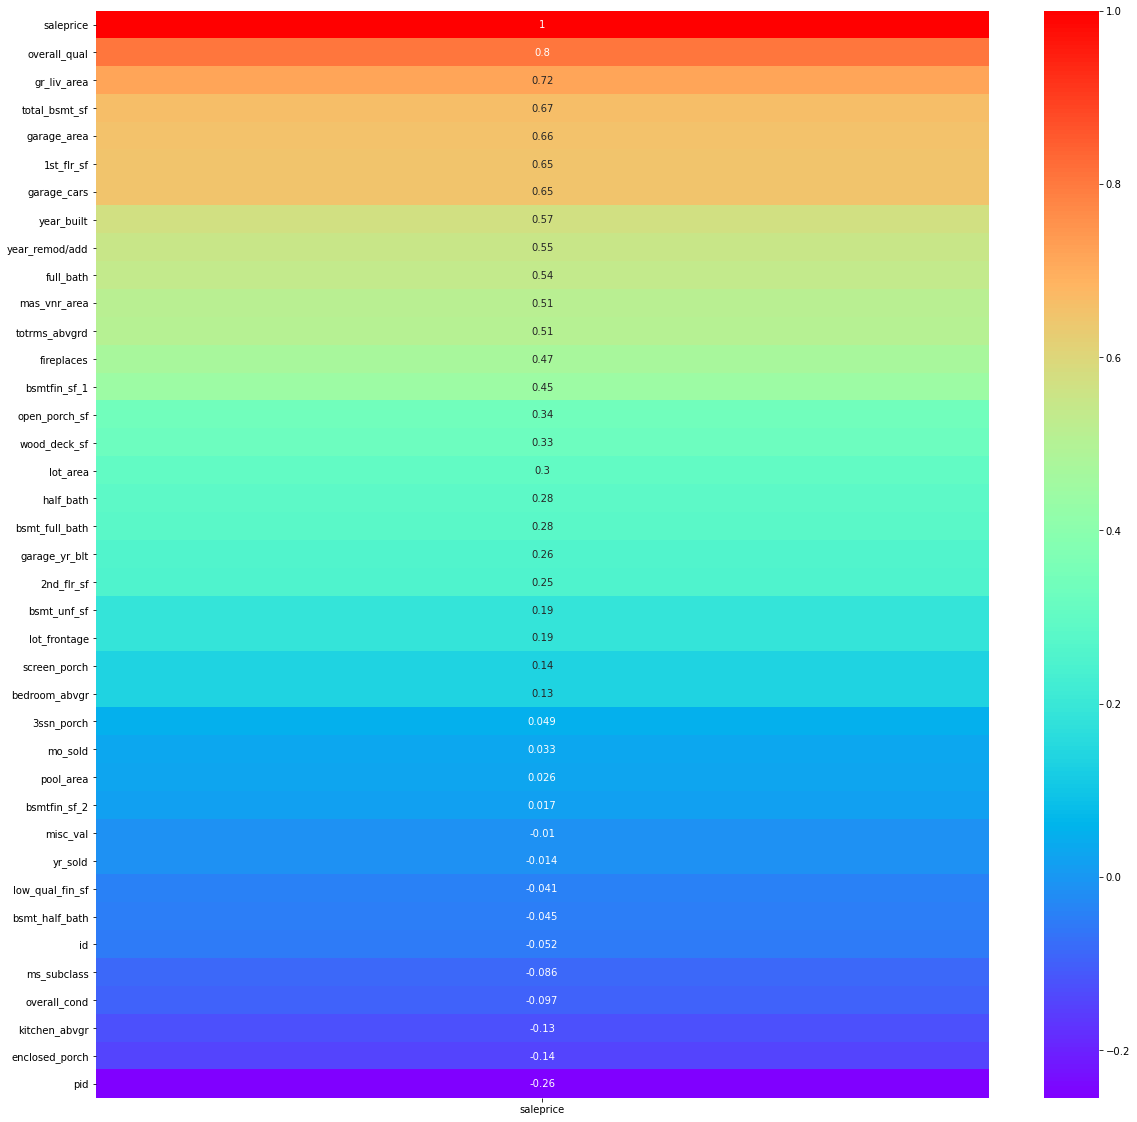

In [50]:
# Checking correlations between numeric features and saleprice. 
plt.figure(figsize=(20, 20))
sns.heatmap(clean_training.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True, cmap='rainbow');

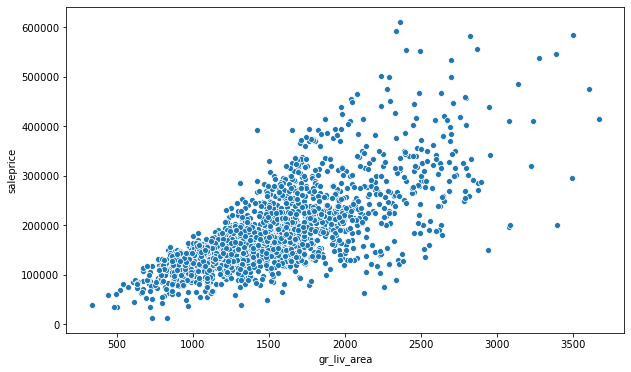

In [51]:
# Detecting outliers. Removing datapoints with above grade area over 4000 sf
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_training, x='gr_liv_area', y='saleprice');
clean_training = clean_training[clean_training['gr_liv_area']<4000]

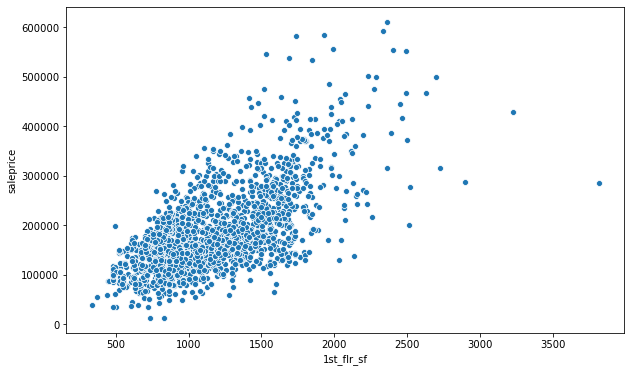

In [44]:
# Detecting outliers. Removing datapoints 1st floor sqft over 3500 sqft.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_training, x='1st_flr_sf', y='saleprice');
clean_training = clean_training[clean_training['1st_flr_sf']<3500]



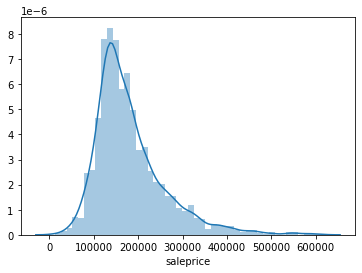

In [52]:
# Checking some distributions. They all seem to be approximately normally distributed.
sns.distplot(clean_training['saleprice']);

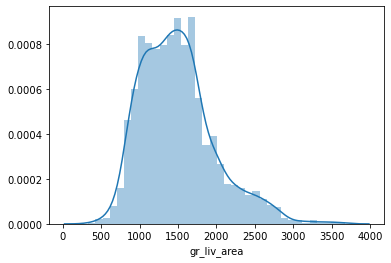

In [46]:
sns.distplot(clean_training['gr_liv_area']);

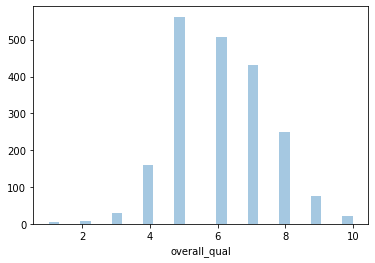

In [47]:
sns.distplot(clean_training['overall_qual'], kde=False, );

All of these histograms look roughly normally distributed.

In [48]:
# Saving my clean CSVs
clean_training.to_csv('./datasets/clean_training.csv')
clean_test.to_csv('./datasets/clean_test.csv')

The next notebook will consist of feature creation, selection and a more indepth exploratory data analysis. 